# Wines Points prediction 

Submission Date : 3.6.2023
Task: Predict the wine score given the inputs
Instructions:
 * Use logistic regression as benchmark model
 * Use sklearn pipeliens + cv + grid search with sklearn models (e.g. KNNs, RandomForest, etc.)
 * Compare all models on proper metric (your choice)

For DNN course project:
* Use sklearn pipeliens with tensorflow models (w/wo embeddings, LSTMs, RNNs, Transformers etc.)
* Compare all models on proper metric (your choice)

In [1]:
# automatic reloading of modules
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

In [2]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install ttp

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

import pandas as pd
import cufflinks as cf; cf.go_offline() # Visualization

import matplotlib.pyplot as plt
import plotly.express as px

import re
import regex

import seaborn as sns

%matplotlib inline

import numpy as np
import string

In [5]:
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\missm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\missm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [9]:
print(os.getcwd())

C:\Users\missm\Python_ML_2023\Exercises\Final Project


In [10]:
wine_reviews = pd.read_csv("../../data/winemag-data-130k-v2.csv")

In [11]:
# EDA

In [12]:
wine_reviews.shape

(129971, 14)

In [13]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
# drop Unnamed: 0 column

wine_reviews.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
# Rows Duplication Check

wine_reviews[wine_reviews.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,Sallier de la Tour,85,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2412,Italy,The Monica grape often shows a rustic or raw q...,Dolia,85,14.0,Sicily & Sardinia,Monica di Sardegna,NaN,NaN,NaN,Cantine di Dolianova 2010 Dolia (Monica di Sa...,Monica,Cantine di Dolianova
2413,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,15.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129879,US,"This wine is a blend of 45% Grenache, 37% Syra...",Metis,90,20.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Maison Bleue 2013 Metis Red (Columbia Valley (...,Red Blend,Maison Bleue
129880,US,Apple blossom intrigues on the nose of this li...,NaN,90,20.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Martin Ray 2015 Chardonnay (Russian River Valley),Chardonnay,Martin Ray
129881,Spain,This Verdejo smells like citrus fruits and wil...,NaN,90,19.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Martinsancho 2015 Verdejo (Rueda),Verdejo,Martinsancho
129882,US,"This wine is mostly Cabernet Sauvignon (78%), ...",Reserve,90,60.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Matthews 2012 Reserve Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Matthews


In [16]:
# Drop Duplications

wine_reviews.drop_duplicates(inplace=True)

wine_reviews.shape

(119988, 13)

In [17]:
# Data Description

In [18]:
# distribution of the numerical data - identifying unusual patterns

wine_reviews.describe()

,points,price
count,119988.000000,111593.000000
mean,88.442236,35.620747
std,3.092915,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [19]:
# distribution of all data - identifying unusual patterns

wine_reviews.describe(include="all")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,119929,119988,85443,119988.000000,111593.000000,119929,100428,46769,95071,90542,119988,119987,119988
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,This opens with subtle aromas of wild flower a...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,NaN,NaN,33656,4174,10233,23560,23560,9,12278,211
mean,NaN,NaN,NaN,88.442236,35.620747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,42.103728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Investigate Target Field

print(sorted(wine_reviews.points.unique()))

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


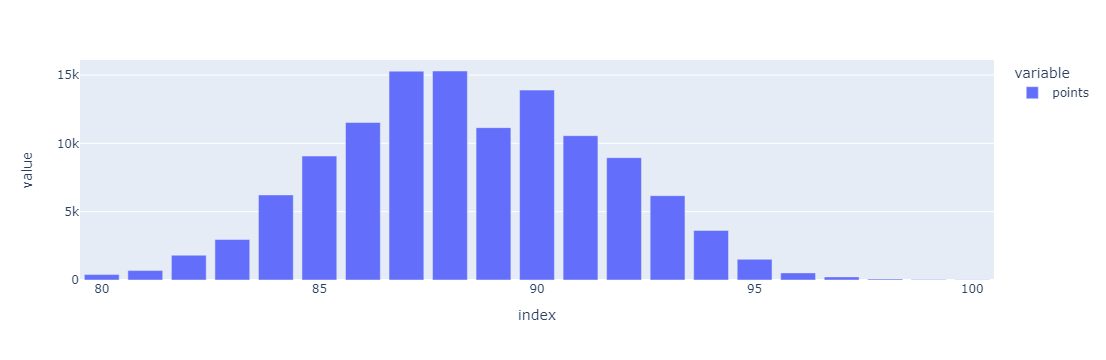

In [21]:
# Score distribution Target Field - normal

px.bar(wine_reviews.points.value_counts())

In [22]:
# relative frequencies of different countries

pd.concat([wine_reviews.country.value_counts().rename('counts'),
           wine_reviews.country.value_counts().rename('proportion').div(wine_reviews.shape[0])], axis=1).head()

,counts,proportion
US,50457,0.420517
France,20353,0.169625
Italy,17940,0.149515
Spain,6116,0.050972
Portugal,5256,0.043804


In [23]:
# For each country, average score and price:

def calc_average_score_and_price(country_df):
    return pd.Series({'average_price': country_df.price.mean(),
                      'average_score': country_df.points.mean()})

In [24]:
stats_by_country = wine_reviews.groupby('country').apply(calc_average_score_and_price)
stats_by_country.head()

,average_price,average_score
country,,
Argentina,24.575264,86.649831
Armenia,14.500000,87.500000
Australia,35.686491,88.561220
Austria,31.336751,90.129532
Bosnia and Herzegovina,12.500000,86.500000


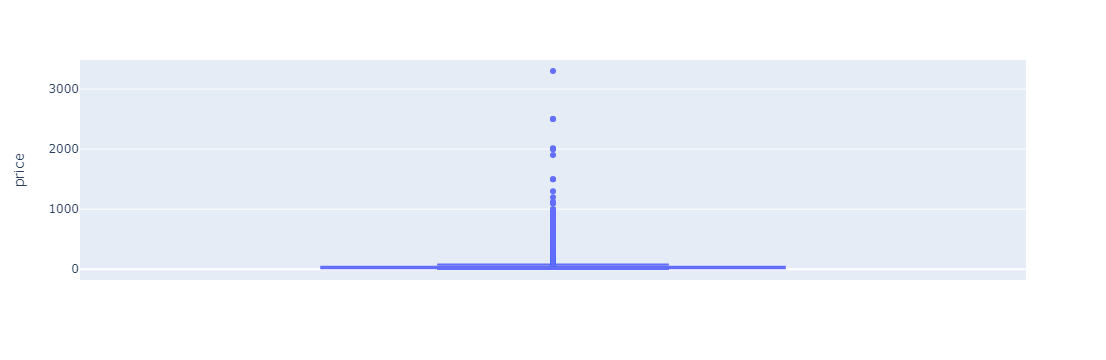

In [25]:
# box plot - distribution of price - identifying outliers

fig = px.box(wine_reviews, y="price")
fig

In [26]:
# identifying missing values (non-null counts), data types, memory

wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [27]:
# filling missing values with 'unknown' in 'taster_name' and 'country' columns

wine_reviews['taster_name'] = wine_reviews['taster_name'].fillna('unknown')
wine_reviews['country'] = wine_reviews['country'].fillna('unknown')

In [28]:
# number of unique values for each column

for col in wine_reviews.columns:
    if col in {"description", 'designation','title','price','winery','region_1','region_2', 'province'} :
        continue
    print(col, ':', len(wine_reviews[col].value_counts()))

country : 44
points : 21
taster_name : 20
taster_twitter_handle : 15
variety : 707


In [29]:
# cleaning categorical columns: converts values to lowercase
# calculate the number of unique values before and after cleaning

for col in wine_reviews.columns:
    if type(wine_reviews[col][0])==str and col!='description':
        number_val_b4clean = wine_reviews[col].nunique()
        print(col, "number of unique value:",wine_reviews[col].nunique())
        wine_reviews[col] = wine_reviews[col].str.lower()
        number_val_afterclean = wine_reviews[col].nunique()
        if number_val_b4clean != number_val_afterclean :
            print(col, "number of unique value after cleaning:",wine_reviews[col].nunique())

country number of unique value: 44
designation number of unique value: 37979
designation number of unique value after cleaning: 37721
province number of unique value: 425
region_1 number of unique value: 1229
taster_name number of unique value: 20
taster_twitter_handle number of unique value: 15
title number of unique value: 118840
title number of unique value after cleaning: 118832
variety number of unique value: 707
winery number of unique value: 16757
winery number of unique value after cleaning: 16731


In [30]:
# unique wineries

wine_reviews.winery.sort_values().nunique()

16731

In [31]:
# lowercase didn't affect the count of unique wineries

wine_reviews.winery.str.lower().sort_values().nunique()

16731

In [32]:
# extract a vintage year from wine_reviews column: 
# a four-digit year that starts with a digit between 1 and 3, followed by any three digits.

wine_reviews['vintage'] = wine_reviews['title'].str.extract(r'.*([1-3][0-9]{3})')

wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,italy,"Aromas include tropical fruit, broom, brimston...",vulkà bianco,87,NaN,sicily & sardinia,etna,NaN,kerin o’keefe,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,2013
1,portugal,"This is ripe and fruity, a wine that is smooth...",avidagos,87,15.0,douro,NaN,NaN,roger voss,@vossroger,quinta dos avidagos 2011 avidagos red (douro),portuguese red,quinta dos avidagos,2011
2,us,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,oregon,willamette valley,Willamette Valley,paul gregutt,@paulgwine,rainstorm 2013 pinot gris (willamette valley),pinot gris,rainstorm,2013
3,us,"Pineapple rind, lemon pith and orange blossom ...",reserve late harvest,87,13.0,michigan,lake michigan shore,NaN,alexander peartree,NaN,st. julian 2013 reserve late harvest riesling ...,riesling,st. julian,2013
4,us,"Much like the regular bottling from 2012, this...",vintner's reserve wild child block,87,65.0,oregon,willamette valley,Willamette Valley,paul gregutt,@paulgwine,sweet cheeks 2012 vintner's reserve wild child...,pinot noir,sweet cheeks,2012


In [33]:
# Drop Outliers - focusing on values with enough data for modeling

In [34]:
# Drop Outliers: vintage

In [35]:
wine_reviews.vintage.nunique()

158

In [36]:
# drop records that appear only once: create a list of vintages (years) that have more than one review

vintage_count = wine_reviews['vintage'].value_counts()
vintage_list = list(vintage_count[vintage_count > 1].index)

In [37]:
# exclude the first 60 vintages and the last 5 vintages 

vintage_list.sort()
vintage_list[60:-5]

['1978',
 '1979',
 '1980',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [38]:
# Filtering DataFrame Based on Selected Vintages

wine_reviews = wine_reviews[wine_reviews['vintage'].isin(list(vintage_list[60:-4]))]
wine_reviews.vintage.nunique()

39

In [39]:
wine_reviews.shape

(115410, 14)

In [40]:
# Drop Outliers: variety

In [41]:
# create a list of variety that have more than 4 reviews

In [42]:
wine_reviews.variety.nunique()

695

In [43]:
variety_count = wine_reviews['variety'].value_counts()
variety_list = list(variety_count[variety_count > 4].index)

In [44]:
# Filtering DataFrame Based on Selected varieties

wine_reviews = wine_reviews[wine_reviews['variety'].isin(list(variety_count.index))]

In [45]:
wine_reviews.variety.nunique()

695

In [46]:
wine_reviews.shape

(115409, 14)

In [47]:
# Drop Outliers: winery

In [48]:
wine_reviews.winery.nunique()

16305

In [49]:
# count of reviews for each winery and points combination

gb_winery = wine_reviews.groupby(['points', 'winery']).size().reset_index(name='count').sort_values(by=['points', 'count'], ascending=False)
gb_winery

,points,winery,count
56244,100,avignonesi,1
56245,100,biondi santi,1
56246,100,cardinale,1
56247,100,casa ferreirinha,1
56248,100,casanova di neri,1
...,...,...,...
319,80,willow creek,1
321,80,woomera,1
322,80,zinsane,1
323,80,zolo,1


In [50]:
# Filtering Wineries with More than 2 Reviews

gb_winery = gb_winery[gb_winery['count'] > 2]

In [51]:
# winery names

winery_names = gb_winery['winery']
winery_names

56216      williams selyem
56161          alpha omega
56192          louis jadot
56159      williams selyem
56099          louis jadot
               ...        
39       bodegas del mundo
182                   love
225                peirano
232           pietra santa
258           santa alicia
Name: winery, Length: 12221, dtype: object

In [52]:
# Filtering wine_reviews based on selected wineries

selected_wineries = list(gb_winery['winery'])
wine_reviews = wine_reviews[wine_reviews['winery'].isin(selected_wineries)]

In [53]:
wine_reviews.winery.nunique()

4443

In [54]:
wine_reviews.shape

(83612, 14)

In [55]:
# new Mean Points colums for Variety and Winery:
# Merge the calculated averages back into the main DataFrame wine_reviews

for field in ['variety', 'winery']:
    group_by_df = wine_reviews.groupby([field])['points'].mean().sort_values(ascending=False).reset_index()
    new_name_avg = 'avg points ' + field
    group_by_df.rename({'points': new_name_avg}, axis=1, inplace=True)
    min_avg = group_by_df[new_name_avg].min()
    max_avg = group_by_df[new_name_avg].max()
    wine_reviews = wine_reviews.merge(group_by_df, on=field, how='right')

In [56]:
# filling missing values with mean in numerical columns

for col in ['price', 'vintage', 'avg points variety', 'avg points winery']:
    wine_reviews[col].fillna(wine_reviews[col].mean(), inplace=True)

In [57]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage,avg points variety,avg points winery
0,italy,The 2008 Ornellaia delivers concentrated aroma...,ornellaia,97,215.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2008 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2008,88.711385,96.888889
1,italy,Le Serre Nuove presents an intense and harmoni...,le serre nuove,93,60.0,tuscany,bolgheri,NaN,unknown,NaN,tenuta dell'ornellaia 2007 le serre nuove (bo...,red blend,tenuta dell'ornellaia,2007,88.711385,96.888889
2,italy,"Consistently among Italy's top-scoring wines, ...",ornellaia,97,200.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2006 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2006,88.711385,96.888889
3,italy,This is a hopelessly gorgeous wine with so muc...,ornellaia,98,175.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2004 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2004,88.711385,96.888889
4,italy,"Spicy and full of cassis, tobacco and coffee a...",ornellaia,96,125.0,tuscany,bolgheri,NaN,michael schachner,@wineschach,tenuta dell'ornellaia 1999 ornellaia (bolgheri),red blend,tenuta dell'ornellaia,1999,88.711385,96.888889


In [58]:
# NLP

In [59]:
# preprocess "description" column cleaning and transforming the text data:

In [60]:
# String of Special Characters to remove from the text

specialChars = ''.join([",", ":", "\"", "=", "&", ";", "%", "$","@", "%", "^", "*", "(", ")", "{", "}",'–','“', '”'
                      "[", "]", "|", "/", "\\", ">", "<", "-","!", "?", ".", "'","--", "---", "#", '‘', '’', '…','—'])

In [61]:
# Space Characters to add spaces around

space_chars = ['.',',',';', '&', '?','!']

In [62]:
# define the remove_by_regex function

def remove_by_regex(description, regexp):
    if isinstance(description, str):
        return re.sub(regexp, '', description)
    else:
        return description

In [63]:
# Defining Preprocessing Functions - Removing: URLs, special characters, usernames (starting with "@"), numbers, emojis.

def remove_urls(description):
    if isinstance(description, str):
        return remove_by_regex(description, regex.compile(r"http\S+"))
    else:
        return description

def remove_special_chars(description):
    if isinstance(description, str):
        return ''.join([c for c in description if c not in specialChars])
    else:
        return description

def remove_usernames(description):
    if isinstance(description, str):
        return remove_by_regex(description, regex.compile(r"@[^\s]+[\s]?"))
    else:
        return description

def remove_numbers(description):
    if isinstance(description, str):
        return remove_by_regex(description, regex.compile(r"\s?[0-9]+\.?[0-9]*"))
    else:
        return description

def remove_emojis(description):
    if isinstance(description, str):
        return demoji.replace(description, '')
    else:
        return description

def add_spaces(description):
    if isinstance(description, str):
        for char in space_chars:
            description = description.replace(char, char + ' ')
        return description
    else:
        return description

In [64]:
# function combines all the preprocessing steps

def leave_language_only(description):
    if isinstance(description, str):
        for f in [remove_urls, remove_emojis, add_spaces, remove_numbers, remove_usernames, remove_special_chars]:
            description = f(description)
        return description
    else:
        return description

In [65]:
# creating a new column named 'pureTextdescription'

wine_reviews['pureTextdescription'] = leave_language_only(wine_reviews.description.str.lower())

In [66]:
wine_reviews.to_csv("winemag-data-130k-v2_EDA.csv")

In [67]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage,avg points variety,avg points winery,pureTextdescription
0,italy,The 2008 Ornellaia delivers concentrated aroma...,ornellaia,97,215.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2008 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2008,88.711385,96.888889,the 2008 ornellaia delivers concentrated aroma...
1,italy,Le Serre Nuove presents an intense and harmoni...,le serre nuove,93,60.0,tuscany,bolgheri,NaN,unknown,NaN,tenuta dell'ornellaia 2007 le serre nuove (bo...,red blend,tenuta dell'ornellaia,2007,88.711385,96.888889,le serre nuove presents an intense and harmoni...
2,italy,"Consistently among Italy's top-scoring wines, ...",ornellaia,97,200.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2006 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2006,88.711385,96.888889,"consistently among italy's top-scoring wines, ..."
3,italy,This is a hopelessly gorgeous wine with so muc...,ornellaia,98,175.0,tuscany,bolgheri superiore,NaN,unknown,NaN,tenuta dell'ornellaia 2004 ornellaia (bolgher...,red blend,tenuta dell'ornellaia,2004,88.711385,96.888889,this is a hopelessly gorgeous wine with so muc...
4,italy,"Spicy and full of cassis, tobacco and coffee a...",ornellaia,96,125.0,tuscany,bolgheri,NaN,michael schachner,@wineschach,tenuta dell'ornellaia 1999 ornellaia (bolgheri),red blend,tenuta dell'ornellaia,1999,88.711385,96.888889,"spicy and full of cassis, tobacco and coffee a..."
